# 1. Load and explore data

In [1]:
# Import all the necessary packages.
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
import sklearn
import matplotlib.pyplot as plt

from sklearn import datasets 
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

In [2]:
# Import the data set.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,EN,Web,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,EN,Web,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,EN,Web,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,EN,Web,1031,fun game!,Four Stars


In [3]:
# View the metadata.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [4]:
# Descriptive statistics
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


# 2. Rename columns

In [5]:
# Print current column names
list(reviews)

['gender',
 'age',
 'remuneration (k£)',
 'spending_score (1-100)',
 'loyalty_points',
 'education',
 'language',
 'platform',
 'product',
 'review',
 'summary']

In [6]:
# Rename columns
reviews.rename(columns = {'remuneration (k£)':'remuneration', 'spending_score (1-100)':'spending_score'}, inplace = True)

In [7]:
# Print new column names
list(reviews)

['gender',
 'age',
 'remuneration',
 'spending_score',
 'loyalty_points',
 'education',
 'language',
 'platform',
 'product',
 'review',
 'summary']

# 3. Linear regression

## 3a: spending vs loyalty

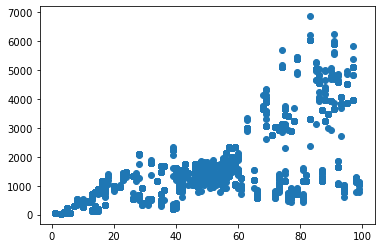

In [8]:
# Dependent variable.
y = reviews["loyalty_points"] 

# Independent variable.
X = reviews["spending_score"]

# Check for linearity.
plt.scatter(X,y)

In [9]:
# OLS model and summary.
f = 'y ~ X'
reviews_spending = ols(f, data = reviews).fit()

reviews_spending.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Wed, 31 Aug 2022   Prob (F-statistic):          2.92e-263
Time:                        11:04:57   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
X             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# Extract the estimated parameters.
print("Parameters: ", reviews_spending.params)  

# Extract the standard errors.
print("Standard errors: ", reviews_spending.bse)  

# Extract the predicted values.
print("Predicted values: ", reviews_spending.predict())  

Parameters:  Intercept   -75.052663
X            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
X             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [11]:
# Set the X coefficient and the constant to generate the regression table.

# x coef: 33.0617.
# Constant coef: -75.0527.

y_pred = 33.0617 * X - 75.0527

y_pred

0       1214.3536
1       2602.9450
2        123.3175
3       2470.6982
4       1247.4153
          ...    
1995    2206.2046
1996     189.4409
1997    2933.5620
1998     453.9345
1999     189.4409
Name: spending_score, Length: 2000, dtype: float64

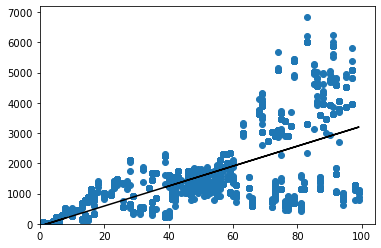

In [12]:
# Plot the graph with a regression line.

# Plot the data points.
plt.scatter(X,y)  

# Plot the regression line (in black).
plt.plot(X,y_pred, color='black') 

# Set the x and y limits on the axes:
plt.xlim(0)
plt.ylim(0)
plt.show()

## 3b: remuneration vs loyalty

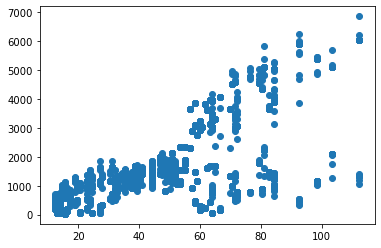

In [13]:
# Dependent variable.
y = reviews["loyalty_points"] 

# Independent variable.
X = reviews["remuneration"]

# Check for linearity.
plt.scatter(X,y)

In [14]:
# OLS model and summary.
f = 'y ~ X'
reviews_remuneration = ols(f, data = reviews).fit()

reviews_remuneration.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Wed, 31 Aug 2022   Prob (F-statistic):          2.43e-209
Time:                        11:04:57   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
X             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# Extract the estimated parameters.
print("Parameters: ", reviews_remuneration.params)  

# Extract the standard errors.
print("Standard errors: ", reviews_remuneration.bse)  

# Extract the predicted values.
print("Predicted values: ", reviews_remuneration.predict())  

Parameters:  Intercept   -65.686513
X            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
X             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [16]:
# Set the X coefficient and the constant to generate the regression table.

# x coef: 34.1878.
# Constant coef: -65.6865.

y_pred = 34.1878 * X - 65.6865

y_pred

0        354.823440
1        354.823440
2        382.857436
3        382.857436
4        410.891432
           ...     
1995    2821.815088
1996    3102.155048
1997    3102.155048
1998    3298.393020
1999    3102.155048
Name: remuneration, Length: 2000, dtype: float64

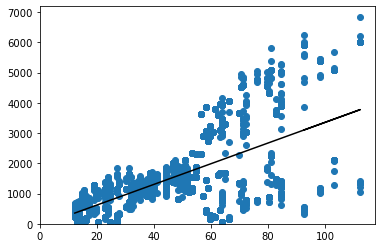

In [17]:
# Plot the graph with a regression line.

# Plot the data points.
plt.scatter(X,y)  

# Plot the regression line (in black).
plt.plot(X,y_pred, color='black') 

# Set the x and y limits on the axes:
plt.xlim(0)
plt.ylim(0)
plt.show()

## 3c: age vs loyalty

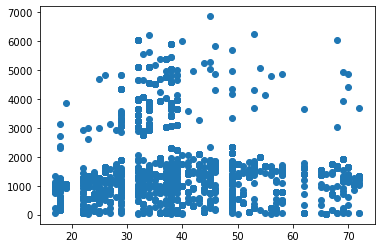

In [18]:
# Dependent variable.
y = reviews["loyalty_points"] 

# Independent variable.
X = reviews["age"]

# Check for linearity.
plt.scatter(X,y)

In [19]:
# OLS model and summary.
f = 'y ~ X'
reviews_age = ols(f, data = reviews).fit()

reviews_age.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Wed, 31 Aug 2022   Prob (F-statistic):             0.0577
Time:                        11:04:58   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
X             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# Extract the estimated parameters.
print("Parameters: ", reviews_age.params)  

# Extract the standard errors.
print("Standard errors: ", reviews_age.bse)  

# Extract the predicted values.
print("Predicted values: ", reviews_age.predict())  

Parameters:  Intercept    1736.517739
X              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
X             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [21]:
# Set the X coefficient and the constant to generate the regression table.

# x coef: - 4.0128.
# Constant coef: 1736.5177.

y_pred = - 4.0128 * X + 1736.5177

y_pred

0       1664.2873
1       1644.2233
2       1648.2361
3       1636.1977
4       1604.0953
          ...    
1995    1588.0441
1996    1563.9673
1997    1600.0825
1998    1600.0825
1999    1608.1081
Name: age, Length: 2000, dtype: float64

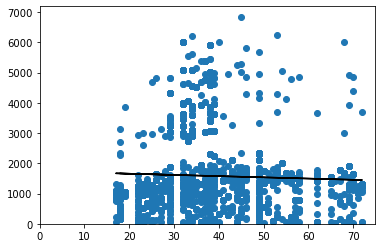

In [22]:
# Plot the graph with a regression line.

# Plot the data points.
plt.scatter(X,y)  

# Plot the regression line (in black).
plt.plot(X,y_pred, color='black') 

# Set the x and y limits on the axes:
plt.xlim(0)
plt.ylim(0)
plt.show()

# Notes

The more people earn/spend and the older they are, 
we would conclude the more loyalty points they would have and the higher spending score.

Spending score vs loyalty: r squared 45% of variation of the data is explained by simple regression model
Remuneration vs loyalty: r squared 38% of variation of the data is explained by simple regression model
Age vs loyalty - there isn't much correlation

Estimated coefficient

y (dependent) - loyalty points
x (independent) - spending score, remuneration, age (can they be used to predict loyalty points)

Spending score is 1 unit higher then there will be 33 increase in loyalty points.

Remuneration is 1 unit higher (so 1 thousand pounds higher) then there will be 34.2 increase in loyalty points.

Spending score: from 1-100
Remuneration: thousands of pounds
Loyalty points: min is 25 points, max 6847

It would be interesting to apply a MLR and see what comes out but the result would inflate the R-squared value. Also, logically there is a relation between the income and the spending, therefore an MLR could show multicollinearity.

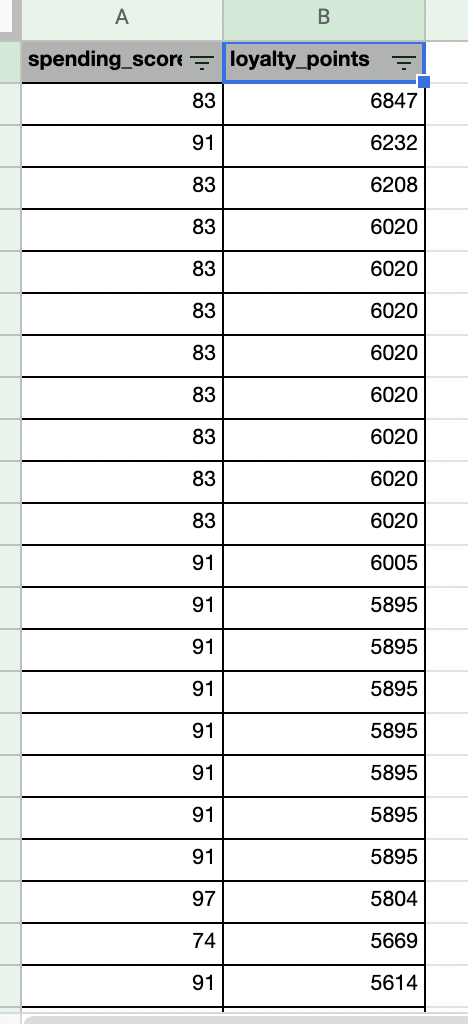

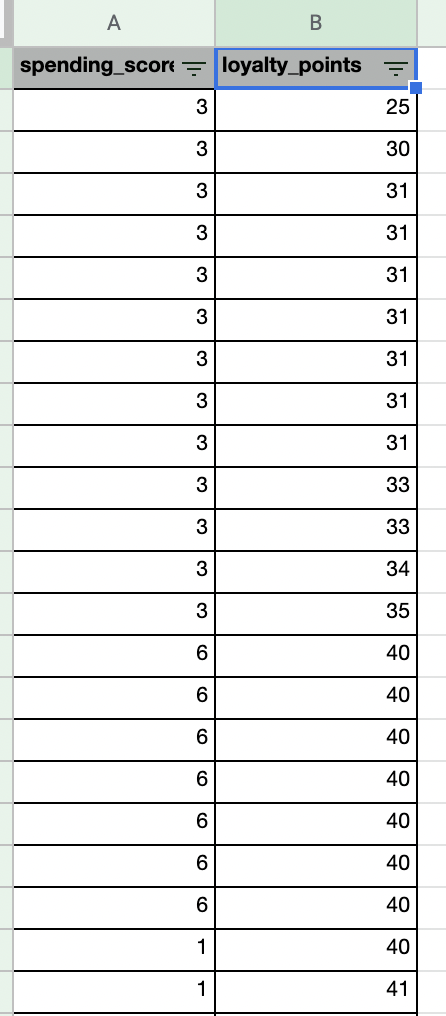

# 4. Market segmentation

In [23]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [24]:
df2 = reviews

In [25]:
df2.columns

Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'language', 'platform', 'product', 'review', 'summary'],
      dtype='object')

In [26]:
df2.drop(labels=['gender', 'age', 'loyalty_points','education', 'language', 'platform', 'product', 'review', 'summary'], axis=1)

,remuneration,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40
...,...,...
1995,84.46,69
1996,92.66,8
1997,92.66,91
1998,98.40,16


<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

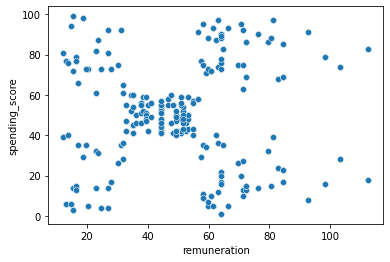

In [27]:
# Import Seaborn and Matplotlib.
from matplotlib import pyplot as plt
import seaborn as sns

# Create a scatterplot with Seaborn.
sns.scatterplot(x='remuneration', y='spending_score',
                data=df2)

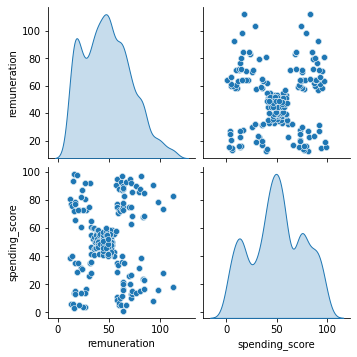

In [28]:
# Create a pairplot with Seaborn.
x = df2[['remuneration', 'spending_score']]

sns.pairplot(df2, vars=x,
            diag_kind= 'kde')

# Elbow method

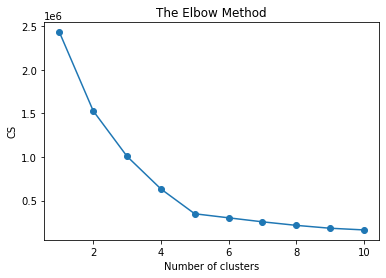

In [29]:
# Import the KMeans class.
from sklearn.cluster import KMeans 

# Elbow chart for us to decide on the number of optimal clusters.
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 500, n_init = 10, random_state = 0)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)

plt.plot(range(1, 11), cs, marker='o')
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("CS")

plt.show()

# Silhouette method

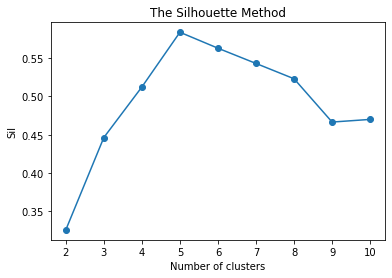

In [30]:
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x, labels, metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1), sil, marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

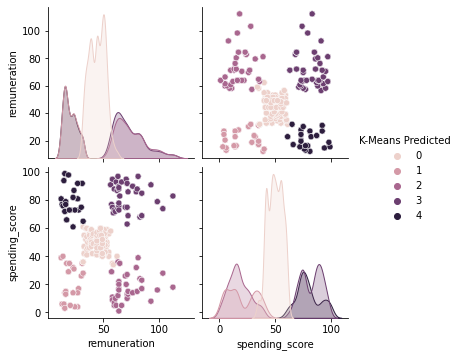

In [31]:
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

In [32]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

In [33]:
# View the K-Means predicted.
print(x.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  1
1         12.30              81                  4
2         13.12               6                  1
3         13.12              77                  4
4         13.94              40                  1


<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

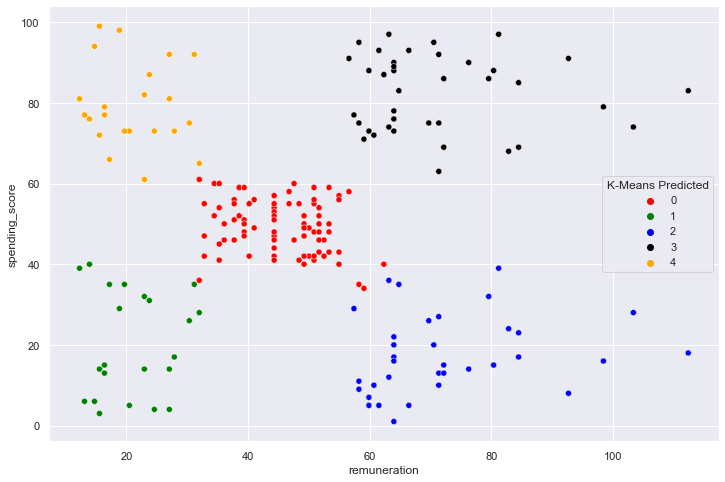

In [34]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=x , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])

## NLP using Python

In [35]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [36]:
# Import the data set.
df3 = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
df3

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,EN,Web,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,EN,Web,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,EN,Web,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,EN,Web,1031,fun game!,Four Stars


In [37]:
df3.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'language', 'platform', 'product',
       'review', 'summary'],
      dtype='object')

In [38]:
df4 = df3.drop(labels=['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'language', 'platform', 'product'], axis=1)

In [39]:
df4.shape

(2000, 2)

In [40]:
# Drop the empty rows.
df4.dropna(subset=['review', 'summary'], inplace=True)

# View the shape of the DataFrame.
df4.shape

(2000, 2)

## Prepare data for NLP

In [41]:
# Transform data to lowercase.
df4['review'] = df4['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df4['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [42]:
# Transform data to lowercase.
df4['summary'] = df4['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df4['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

In [43]:
df4

,review,summary
0,"when it comes to a dm's screen, the space on t...",the fact that 50% of this space is wasted on a...
1,an open letter to galeforce9*: your unpainted ...,another worthless dungeon master's screen from...
2,"nice art, nice printing. why two panels are fi...","pretty, but also pretty useless"
3,amazing buy! bought it as a gift for our new d...,five stars
4,as my review of gf9's previous screens these w...,money trap
...,...,...
1995,the perfect word game for mixed ages (with mom...,the perfect word game for mixed ages (with mom
1996,great game. did not think i would like it when...,super fun
1997,great game for all......... keeps the mind nim...,great game
1998,fun game!,four stars


In [44]:
# Remove punctuation.
df4['review'] = df4['review'].str.replace('[^\w\s]','')

# Preview the result.
df4['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [45]:
# Remove punctuation.
df4['summary'] = df4['summary'].str.replace('[^\w\s]','')

# Preview the result.
df4['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

In [46]:
# Check the number of duplicate values in the review column.
df4.review.duplicated().sum()

50

In [47]:
# Drop duplicates.
df5 = df4.drop_duplicates(subset=['review'])

In [48]:
# Check the number of duplicate values in the summary column.
df4.summary.duplicated().sum()

649

In [49]:
# Drop duplicates.
df5 = df4.drop_duplicates(subset=['summary'])

In [50]:
# Preview data.
df5.reset_index(inplace=True)
df5.head()

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap


In [51]:
df5.shape

(1351, 3)

## Tokenise and create wordclouds

In [52]:
# Install nltk library 
!pip install nltk

# Import nltk and download nltk's resources to assist with tokenisation.
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/a.koerkemeier/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [53]:
# Tokenise the words in review column
df5['tokens'] = df5['review'].apply(word_tokenize)

# Preview data.
df5['tokens'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: tokens, dtype: object

In [54]:
# Tokenise the words in summary column
df5['tokens'] = df5['summary'].apply(word_tokenize)

# Preview data.
df5['tokens'].head()

0    [the, fact, that, 50, of, this, space, is, was...
1    [another, worthless, dungeon, masters, screen,...
2                 [pretty, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: tokens, dtype: object

In [55]:
# Define an empty list of tokens.
all_tokens = []

for i in range(df5.shape[0]):
    # Add each token to the list.
    all_tokens = all_tokens + df5['tokens'][i]

In [56]:
all_tokens

['the',
 'fact',
 'that',
 '50',
 'of',
 'this',
 'space',
 'is',
 'wasted',
 'on',
 'art',
 'and',
 'not',
 'terribly',
 'informative',
 'or',
 'needed',
 'art',
 'another',
 'worthless',
 'dungeon',
 'masters',
 'screen',
 'from',
 'galeforce9',
 'pretty',
 'but',
 'also',
 'pretty',
 'useless',
 'five',
 'stars',
 'money',
 'trap',
 'best',
 'gm',
 'screen',
 'ever',
 'great',
 'but',
 'could',
 'be',
 'even',
 'better',
 'another',
 'missed',
 'opportunity',
 'not',
 'a',
 'value',
 'add',
 'to',
 'the',
 'product',
 'line',
 'love',
 'the',
 'map',
 'not',
 'a',
 'general',
 'dm',
 'screen',
 'very',
 'weak',
 'game',
 'fell',
 'completely',
 'flat',
 'good',
 'book',
 'buckley',
 'was',
 'a',
 'card',
 'mommer',
 'very',
 'advanced',
 'but',
 'as',
 'good',
 'as',
 'it',
 'gets',
 'you',
 'better',
 'know',
 'what',
 'youre',
 'getting',
 'into',
 'dont',
 'bother',
 'the',
 'worst',
 'value',
 'ive',
 'ever',
 'seen',
 'not',
 'enough',
 'product',
 'good',
 'product',
 'but',
 

In [57]:
# Import the FreqDist class.
from nltk.probability import FreqDist

# Calculate the frequency distribution.
fdist = FreqDist(all_tokens)

# Preview data.
fdist

FreqDist({'game': 268, 'the': 258, 'a': 238, 'great': 237, 'for': 229, 'to': 192, 'fun': 175, 'and': 168, 'it': 139, 'of': 131, ...})

In [58]:
# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
tokens1 = [word for word in all_tokens if word.isalnum()]

In [59]:
# Download the stop word list.
nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stop words.
tokens2 = [x for x in tokens1 if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens2_string = ''

for value in tokens2:
    # Add each filtered token word to the string.
    tokens2_string = tokens2_string + value + ' '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/a.koerkemeier/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


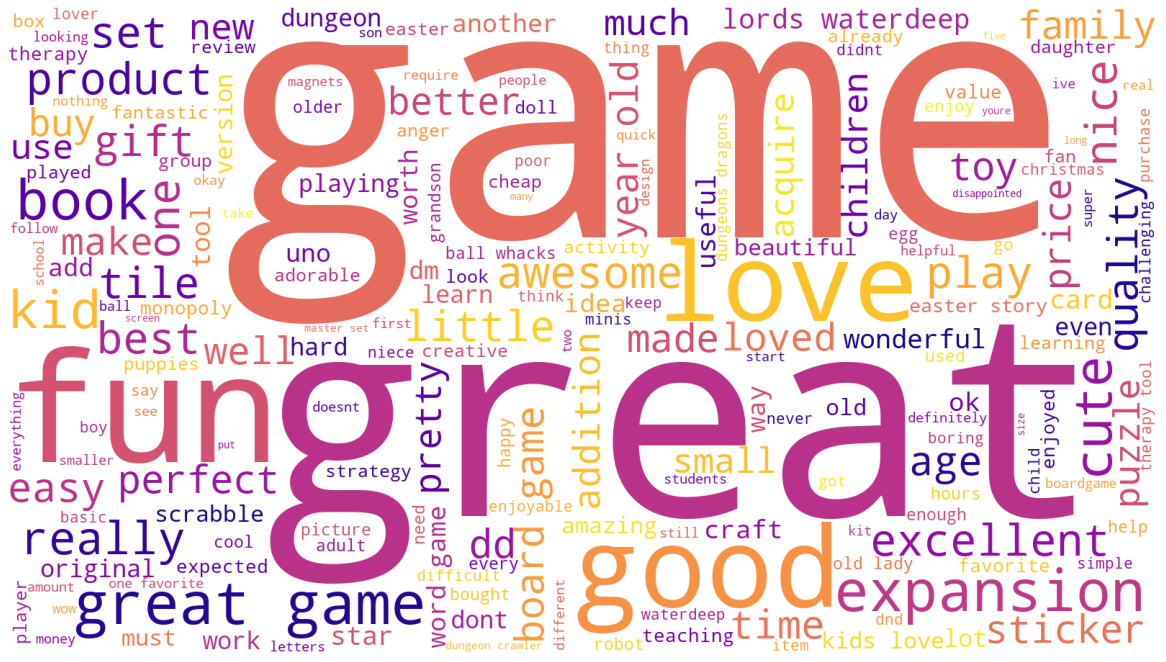

In [60]:
# Create a WordCloud.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens2_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

## Frequency distribution

In [61]:
# View the frequency distribution.
fdist1 = FreqDist(tokens2)

# Preview the data.
fdist1

FreqDist({'game': 268, 'great': 237, 'fun': 175, 'good': 84, 'love': 70, 'like': 54, 'kids': 48, 'book': 42, 'expansion': 42, 'cute': 40, ...})

In [62]:
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
counts = pd.DataFrame(Counter(tokens2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts

,Frequency
Word,
game,268
great,237
fun,175
good,84
love,70
like,54
kids,48
book,42
expansion,42


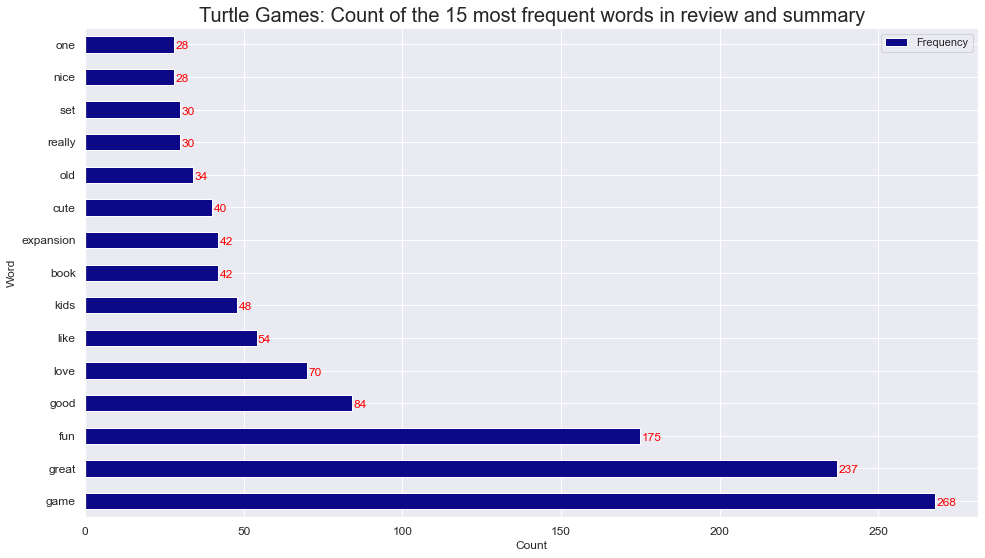

In [68]:
# Set the plot type.
ax = counts.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Turtle Games: Count of the 15 most frequent words in review and summary",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

## Polarity

In [64]:
# Install TextBlob.
!pip install textblob

# Import the necessary package.
from textblob import TextBlob

In [65]:
# Define a function to extract a polarity score for review
def generate_polarity(comment):
    return TextBlob(comment).sentiment[0]

# Populate a new column with polarity scores for each review
df5['polarity'] = df5['review'].apply(generate_polarity)

# Preview the result.
df5['polarity'].head()

0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: polarity, dtype: float64

In [66]:
# Define a function to extract a polarity score for summary
def generate_polarity(comment):
    return TextBlob(comment).sentiment[0]

# Populate a new column with polarity scores for each summary
df5['polarity'] = df5['summary'].apply(generate_polarity)

# Preview the result.
df5['polarity'].head()

0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: polarity, dtype: float64

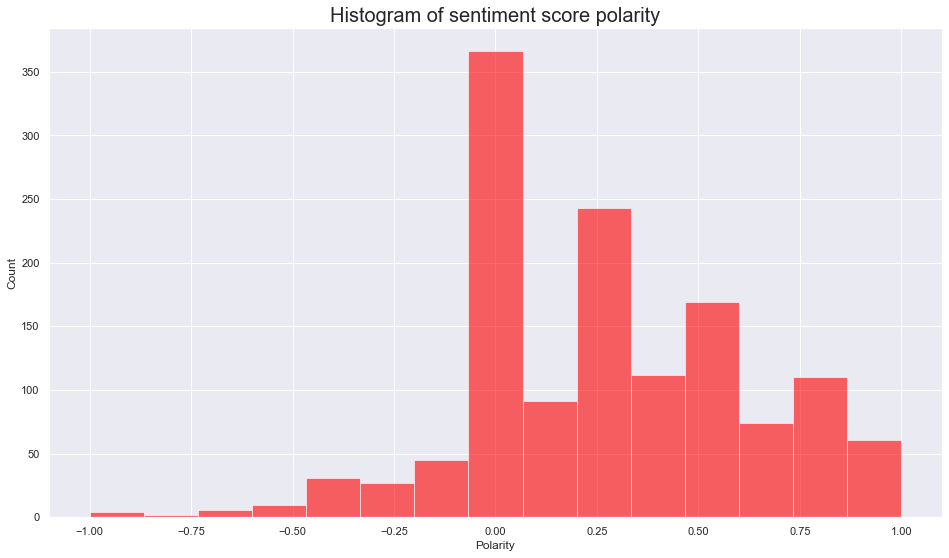

In [67]:
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df5['polarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity', fontsize=20)

plt.show();

In [69]:
# Define a function to extract a subjectivity score for the review.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

# Populate a new column with subjectivity scores for each review.
df5['subjectivity'] = df5['review'].apply(generate_subjectivity)

# Preview the result.
df5['subjectivity'].head()

0    0.486111
1    0.442976
2    0.430435
3    0.784848
4    0.316667
Name: subjectivity, dtype: float64

In [70]:
# Define a function to extract a subjectivity score for the summary.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

# Populate a new column with subjectivity scores for each summary.
df5['subjectivity'] = df5['summary'].apply(generate_subjectivity)

# Preview the result.
df5['subjectivity'].head()

0    0.500000
1    0.900000
2    0.733333
3    0.000000
4    0.000000
Name: subjectivity, dtype: float64

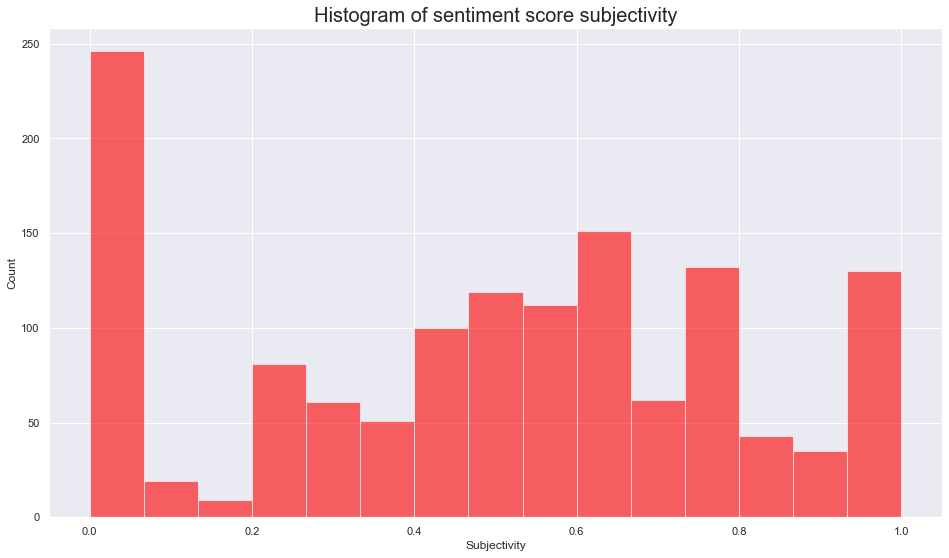

In [71]:
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df5['subjectivity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Subjectivity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score subjectivity', fontsize=20)

plt.show();

In [73]:
# Extracting top 10 most positive reviews and summaries

# Create a DataFrame.
positive_sentiment = df5.nlargest(10, 'polarity')

# Eliminate unnecessary columns.
positive_sentiment = positive_sentiment[['review', 'summary', 'polarity', 'subjectivity']]

# Adjust the column width.
positive_sentiment.style.set_properties(subset=['review'], **{'width': '1200px'})

,review,summary,polarity,subjectivity
5,i have bought many gm screens over the years but this one is the best i have ever seen it has all the relevant information i need and no crap filler on it very happy with this screen,best gm screen ever,1.000000,0.300000
23,these are intricate designs for older children and adults this book is full of beautiful designs just waiting to be awakened by your choice of colors great for creativity,wonderful designs,1.000000,1.000000
27,awesome my 8 year olds favorite xmas gift its 915 am xmas morning and hes already colored three of these,perfect,1.000000,1.000000
61,my daughter loves these little books theyre the perfect size to keep in the car or a diaper bag or purse i keep them on hand for times when were stuck waiting in a doctors office or anywhere else,theyre the perfect size to keep in the car or a diaper,1.000000,1.000000
107,this occupied my almost3 year old for nearly an hour stickers were durable and easy to peel afterwards he kept going back to the box to see if there were more robot stickers to assemble in there ill probably drop another dollar and buy it again for his christmas stocking three cheers for the short memory of a preschooler,perfect for preschooler,1.000000,1.000000
112,i bought 8 of these for my 3 year old daughters robot themed birthday party as favors for the little ones and it was a great hit i didnt realize that the stickers were robot parts that the kids assemble themselves to create their own robots that was a lot of fun and for the price it was well worth it,awesome sticker activity for the price,1.000000,1.000000
132,my 8 year old son loves this drawing book loves it,awesome book,1.000000,1.000000
133,this was a christmas present for a nephew who loves to draw and he loves superheroes he was very happy with his gift,he was very happy with his gift,1.000000,1.000000
150,great product took a little practice and time but after you get the hang of it it turns into a cute cuddly little friend mine didnt turn out exactly like the picture but it adds a taste of your own sense of style they are super cute and comes with everything it says it will,awesome,1.000000,1.000000
166,i was skeptical but my 9 year old has had so much fun with this kit and it was her favorite christmas present she pretty much made the puppies herself with minimal help from me though i did hot glue some ears rather than use the included glue only downside is the cuttings can be messy but really wonderful instructions wellmade supplies and can be used for many yearsand maybe even making different animals if you are creative highly recommend for artsy determined 9 year olds i actually want to try to make one myself they are so darn cute,awesome and welldesigned for 9 year olds,1.000000,1.000000


In [74]:
# Extracting top 10 most negative reviews and summaries

# Create a DataFrame.
negative_sentiment = df5.nsmallest(10, 'polarity')

# Eliminate unnecessary columns.
negative_sentiment = negative_sentiment[['review', 'summary', 'polarity', 'subjectivity']]

# Eliminate unnecessary columns.
negative_sentiment.style.set_properties(subset=['review'], **{'width': '1200px'})

,review,summary,polarity,subjectivity
17,these are cute tatoos for those who love pirates however the retail price is 150 and amazons price is more than double i have never paid over the retail price for an item at amazon i was shocked there are only a handful of tatoos and for 150 i wouldnt mind but to charge 350 for an item that sells anywhere else for 150 is criminal find it at a local drugstore and save your,the worst value ive ever seen,-1.000000,1.000000
165,booo unles you are patient know how to measure i didnt have the patience neither did my daughter boring unless you are a craft person which i am not,boring unless you are a craft person which i am,-1.000000,1.000000
588,ive discovered that im really new school when it comes to my board games except for boggle and a couple chess boards and a novelty version of yahtzee this is the oldest game i own by more than 30 years its very watered down for my usual tastes gameplay consists of playing tiles on a board to start expand or merge hotel chains then you buy stocks trying to predict which ones will grow so you can buy as low as possible and sell them for huge profits by the end of the game the player with the most money at the end wins i think this game is certainly better with more people it can accommodate up to 6 and that may be too many ive never played with that number but with 3 or fewer it is too easy to run away with the game more players offers more competition and gaps between your turns and dilutes the available stock with three you can see what tiles you have available and buy up huge amounts of stock early before other players have time to react and attempt to thwart your plan or prevent you from a big payout ive enjoyed power grid and have intended on playing a deeper economic game for some time but this certainly isnt it this is much more shallow an experience although it does play reasonably quickly and may fill a shorter time slot if players are looking for a quick buy and sell stock game,boring,-1.000000,1.000000
838,before this i hated running any rpg campaign dealing with towns because it kills the momentum and just becomes 2 hours of haggling for magic items this helps open up story ideas and plot hooks,before this i hated running any rpg campaign dealing with towns because it,-0.900000,0.700000
1,an open letter to galeforce9 your unpainted miniatures are very not bad your spell cards are great your board games are meh your dm screens however are freaking terrible im still waiting for a single screen that isnt polluted with pointless artwork where useful referenceable tables should be once again youve created a single use screen that is only useful when running the storm kings thunder adventure even despite the fact that its geared to that adventure path its usefulness negligible at best i massive swath of the inner panel is wasted on artwork and a bloated overland map which could have been easily reduced to a single panel in size and the few table you have are nighuseless themselves in short stop making crap dm screens,another worthless dungeon masters screen from galeforce9,-0.800000,0.900000
116,my kids grew up with a peg bench and hammer and loved it but i bought this brand for my grandson and was disappointed the pegs fit too loosely into the bench and he does not even use his hammer to pound them in as he can just push them in with his hand or sometimes they fall through automatically my suggestion is to make the pegs fit a little tighter so the kids can learn skills of coordination etc when pounding them in the pegs are nice and thick for little hands but just not snug enough fitting to really use the toy as it is intended,disappointed,-0.750000,0.750000
266,i found that this card game does the opposite of what it was intended for it actually has the kids focusing on ways to get angry etc instead of teaching how to be calm and act better it really should have been tested before sale a better game would have been calm dragon i tried this game o